<a href="https://colab.research.google.com/github/ruthreich-star/LoanDefault/blob/main/LoanDefaultDatacleansin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from google.colab import files
import pickle
import os
from scipy import stats
from scipy.stats import zscore

!pip install missingno
import missingno as msno

!pip install fancyimpute
import fancyimpute

!pip install --upgrade autoviz
from autoviz.AutoViz_Class import AutoViz_Class

warnings.filterwarnings("ignore")
%matplotlib inline

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 154.7/154.7 kB 11.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=b56fcc0795f98af1f8e956693d8846137d81e37211a8056e1db0aa6bf29ee652
  Stored in directory: /root/.cache/pip/wheels/df/20/91/e4850b9a31cf660c1bc95515d3bcbc8010e869e5de6d5baf07
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=44a1568b39c093bbefa529c996abae0f3bb9fcfb35a6dde7c750c664ffc7a3e7
  Stored in directory: /root/.cache/pip/wheels/89/11/61/aa5a3167bfff49218cd043a73a83034b9eadd858b0059521be
Successfully built fancyimpute knnimpute
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67.5/67.5 kB 5.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [2]:
# BG_BLACK = "\033[40m"
# BG_RED = "\033[41m"
# BG_GREEN = "\033[42m"
# BG_YELLOW = "\033[43m"
# BG_BLUE = "\033[44m"
# BG_MAGENTA = "\033[45m"
# BG_CYAN = "\033[46m"
# BG_WHITE = "\033[47m"
# BG_DARK_GRAY = "\033[100m"
# BG_BRIGHT_RED = "\033[101m"
# BG_BRIGHT_GREEN = "\033[102m"
# BG_BRIGHT_YELLOW = "\033[103m"
# BG_BRIGHT_BLUE = "\033[104m"
# BG_BRIGHT_MAGENTA = "\033[105m"
# BG_BRIGHT_CYAN = "\033[106m"
# BG_WHITE = "\033[107m"
# RESET = "\033[0m" # Reset all formatting

In [3]:
np.random.seed(31071967)

In [4]:
download_pickels = True

In [81]:
import os, pathlib, sys
!mkdir -p pickles
pickle_file = '/content/pickles/load_default_clean.pkl'

if not os.path.exists(pickle_file):
# Upload file
  uploaded = files.upload()

# Read pickle into DataFrame
df = pd.read_pickle(pickle_file)

df.head()

id    loan_amnt  funded_amnt  funded_amnt_inv    term     int_rate  \
1  545583    2500        2500           2500        36 months  13.9800    
2  532101    5000        5000           5000        36 months  15.9500    
3  877788    7000        7000           7000        36 months   9.9100    
4  875406    2000        2000           2000        36 months   5.4200    
5  506439    3600        3600           3600        36 months  10.2500    

   installment emp_length home_ownership  annual_inc verification_status  \
1       85         4.0           RENT        20004       Not Verified      
2      176         4.0           RENT        59000       Not Verified      
3      226        10.0       MORTGAGE        53796       Not Verified      
4       60        10.0           RENT        30000       Not Verified      
5      117        10.0       MORTGAGE       675048       Not Verified      

        purpose       addr_state    dti   delinq_2yrs  inq_last_6mths  \
1               other     MI     19.8600       0              5         
2  debt_consolidation     NY     19.5700       0              1         
3               other     TX     10.8000       3              3         
4  debt_consolidation     NY      3.6000       0              0         
5               other     AL      1.5500       0              4         

   open_acc  pub_rec  revol_bal  revol_util  total_acc  total_pymnt  \
1      7        0         981     21.3000       10         3075       
2      7        0       18773     99.9000       15         2949       
3      7        0        3269     47.2000       20         8082       
4      7        0           0      0.0000       15         2162       
5      8        0           0      0.0000       25         4206       

   total_pymnt_inv  total_rec_prncp  total_rec_int  last_pymnt_amnt  \
1       3075             2500             575              91         
2       2949             1909             874             176         
3       8082             7000            1082            1550         
4       2162             2000             162              53         
5       4206             3600             606             147         

   repay_fail  issue_d_year  issue_d_month  earliest_cr_line_year  \
1       0          2010            7                2005            
2       1          2010            6                1994            
3       0          2011            9                1998            
4       0          2011            9                1975            
5       0          2010            4                1998            

   earliest_cr_line_month  last_pymnt_d_year  last_pymnt_d_month  \
1             8                  2013                  7           
2             4                  2011                 11           
3             3                  2014                  3           
4             1                  2014                  2           
5             4                  2013                  5           

   last_credit_pull_d_year  last_credit_pull_d_month  
1           2016                        6             
2           2012                        3             
3           2014                        3             
4           2016                        6             
5           2016                        6

In [50]:
df.describe()

id         loan_amnt    funded_amnt  funded_amnt_inv  \
count  3.847800e+04       38478.0       38478.0        38478.0     
mean   6.650325e+05  11095.015983  10832.137845   10150.404985     
std    2.191854e+05   7405.296268   7146.733214    7127.932429     
min    5.473400e+04         500.0         500.0            0.0     
25%    4.983722e+05        5200.0        5100.0         4950.0     
50%    6.443430e+05        9750.0        9600.0         8497.5     
75%    8.265722e+05       15000.0       15000.0        14000.0     
max    1.077430e+06       35000.0       35000.0        35000.0     

         int_rate    installment   annual_inc        dti      delinq_2yrs  \
count  38478.000000     38478.0        38477.0  38478.000000    38478.0     
mean      12.162307  323.175945   68997.102061     13.376215   0.151931     
std        3.709485  209.082568   64476.267149      6.729713   0.507598     
min        5.420000        16.0         1896.0      0.000000        0.0     
25%        9.620000       166.0        40000.0      8.200000        0.0     
50%       11.990000       278.0        58650.0     13.485000        0.0     
75%       14.720000       429.0        82000.0     18.690000        0.0     
max       24.110000      1305.0      6000000.0     29.990000       11.0     

       inq_last_6mths  open_acc   pub_rec    revol_bal    revol_util   \
count      38478.0      38478.0   38478.0       38475.0  38419.000000   
mean       1.08397     9.343209  0.057903  14290.237687     49.110081   
std       1.534824     4.497881   0.24571  21941.541465     28.353097   
min            0.0          1.0       0.0           0.0      0.000000   
25%            0.0          6.0       0.0        3640.0     25.700000   
50%            1.0          9.0       0.0        8840.0     49.600000   
75%            2.0         12.0       0.0       17266.0     72.700000   
max           33.0         47.0       5.0     1207359.0    119.000000   

       total_acc   total_pymnt  total_pymnt_inv  total_rec_prncp  \
count    38478.0       38478.0        38478.0          38478.0     
mean   22.109049  11981.008472   11274.811581      9646.661599     
std    11.588253   9006.416265    8946.160564      7051.749973     
min          1.0           0.0            0.0              0.0     
25%         13.0        5463.0        4812.25           4400.0     
50%         20.0        9673.5         8954.0           8000.0     
75%         29.0      16402.75        15487.0          13317.5     
max         90.0       58564.0        58564.0          35000.0     

       total_rec_int  last_pymnt_amnt   repay_fail   issue_d_year  \
count       38478.0         38478.0    38478.000000       38478.0   
mean    2232.827382     2614.511591        0.151463   2010.233042   
std       2570.1864     4392.002927        0.358504      0.962635   
min             0.0             0.0        0.000000        2007.0   
25%           658.0           212.0        0.000000        2010.0   
50%          1335.0           526.0        0.000000        2011.0   
75%          2795.0          3170.0        0.000000        2011.0   
max         23611.0         36115.0        1.000000        2011.0   

       issue_d_month  earliest_cr_line_year  earliest_cr_line_month  \
count     38478.0             38478.0                38478.0          
mean     7.131816           1996.5841               6.878424          
std      3.416248            6.832742               3.536742          
min           1.0              1946.0                    1.0          
25%           4.0              1993.0                    4.0          
50%           7.0              1998.0                    7.0          
75%          10.0              2001.0                   10.0          
max          12.0              2008.0                   12.0          

       last_pymnt_d_year  last_pymnt_d_month  last_credit_pull_d_year  \
count         38407.0           38407.0                 38475.0         
mean      2012.703856     

In [82]:
df_with_Orig_nulls = df.copy() # keep for visualizations

In [83]:
unique_id_cols = ['id']
#1
dup_cols       = []
#0
large_cat_cols = []
#0
small_cat_cols = ['term','emp_length','home_ownership','verification_status','purpose','addr_state']
#6
cont_cols      = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',
                  'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','pub_rec']#,'months_between_earliest_to_issue']
#19
date_cols      = ['issue_d_year','issue_d_month','earliest_cr_line_year','earliest_cr_line_month','last_pymnt_d_year','last_pymnt_d_month','last_credit_pull_d_year','last_credit_pull_d_month']
#8
cat_cols       = large_cat_cols + small_cat_cols
y_col          = ['repay_fail']
#1
MERGE_ID_COL   = 'id' # if we'll need to merge pickels later
x_cols             = cont_cols + date_cols


**Imputate original NULLS**

In [84]:
df.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
emp_length                  993
home_ownership                0
annual_inc                    1
verification_status           0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     3
revol_util                   59
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
last_pymnt_amnt               0
repay_fail                    0
issue_d_year                  0
issue_d_month                 0
earliest_cr_line_year         0
earliest_cr_line_month        0
last_pymnt_d_year            71
last_pymnt_d_month           71
last_credit_pull_d_year       3
last_credit_pull_d_month      3
dtype: int64

For a very small or nearly zero amount of NULL values, intuitive imputation can be applied.

In [85]:
#for 3 NULL in last_credit_pull_d_year,last_credit_pull_d_month - the loan issue date
df['last_credit_pull_d_year'] = df['last_credit_pull_d_year'].fillna(df['issue_d_year'])
df['last_credit_pull_d_month'] = df['last_credit_pull_d_month'].fillna(df['issue_d_month'])

In [86]:
#few rows fillna with median
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())

In [87]:

mask = (
    df['revol_bal' ].isna() | df['revol_bal' ].astype(str).str.strip().eq('') |
    df['revol_util'].isna() | df['revol_util'].astype(str).str.strip().eq('')
)

missing_rows = df.loc[mask, ['revol_bal', 'revol_util']]
print(missing_rows)

# ◊õ◊û◊î ◊©◊ï◊®◊ï◊™ ◊†◊û◊¶◊ê◊ï
print('rows with missing revol_bal or revol_util:', missing_rows.shape[0])


       revol_bal  revol_util
1123         0         NaN  
3069         0         NaN  
3540         0         NaN  
3646         0         NaN  
3668         0         NaN  
3886         0         NaN  
4260         0         NaN  
5131         0         NaN  
6114         0         NaN  
6626         0         NaN  
7512         0         NaN  
7663         0         NaN  
8193         0         NaN  
8206         0         NaN  
8212         0         NaN  
8364         0         NaN  
8485         0         NaN  
9613         0         NaN  
11700        0         NaN  
11984        0         NaN  
12335    49238         NaN  
12370        0         NaN  
13128        0         NaN  
13662        0         NaN  
15356        0         NaN  
15650        0         NaN  
15684        0         NaN  
17202        0         NaN  
17356        0         NaN  
18491        0         NaN  
19712        0         NaN  
20010        0         NaN  
20942        0         NaN  
21064        0

In [ ]:
#because most of the REVOL_UTIL NaN have REVOL_BAL 0 ' ichek the REVAL_UTIL not NaN of REVOL_BAL = 0 - most of them are 0 so fill NanN of revol_util by 0 where Revoal_bal = 0

In [88]:

# ◊î◊û◊®◊î ◊ú◊û◊°◊§◊®◊ô◊ù (◊ê◊ù ◊ô◊© ◊û◊ó◊®◊ï◊ñ◊ï◊™), ◊ë◊ú◊ô ◊î◊°◊®◊™ ◊ê◊ó◊ï◊ñ◊ô◊ù
ru_num = pd.to_numeric(df['revol_util'], errors='coerce')

# ◊û◊°◊ô◊õ◊î: revol_bal == 0 ◊ï-revol_util ◊ú◊ê ◊ó◊°◊®
mask = (df['revol_bal'] == 0) & (~ru_num.isna())

vals = ru_num[mask]

less_1     = (vals < 1).sum()
greater_1  = (vals >= 1).sum()

print(f"<1: {less_1}")
print(f">= 1: {greater_1}")
# ◊ê◊ï◊§◊¶◊ô◊ï◊†◊ú◊ô:
# print(f"= 1: {(vals == 5).sum()}")
# print(f"Total considered: {vals.shape[0]}")



<1: 850
>= 1: 69


In [89]:
print(df.isnull().sum()[df.isnull().any()])

emp_length            993
revol_bal               3
revol_util             59
last_pymnt_d_year      71
last_pymnt_d_month     71
dtype: int64


In [90]:
#for so few Nan put the median
df[['revol_bal', 'revol_util']] = df[['revol_bal', 'revol_util']].fillna(
    df[['revol_bal', 'revol_util']].median(numeric_only=True)
)
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

In [91]:
print(df.isnull().sum()[df.isnull().any()])

last_pymnt_d_year     71
last_pymnt_d_month    71
dtype: int64


In [ ]:
#for last_payment_date - add the mean month between issue_date and payment_date to the issue_date in the line and cakculate the last_pymnt_d_year	last_pymnt_d_month with NAN

In [92]:
# ◊†◊ï◊ï◊ì◊ê ◊ò◊ô◊§◊ï◊°◊ô◊ù ◊†◊ï◊û◊®◊ô◊ô◊ù ◊¢◊ù NA ◊ó◊ï◊ß◊ô
for c in ['issue_d_year','issue_d_month','last_pymnt_d_year','last_pymnt_d_month']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int64')

# 1) ◊ë◊†◊ô◊ô◊™ issue_d ◊ï-last_pymnt_d ◊û-(year, month), ◊ô◊ï◊ù=01
def build_dt(year_col, month_col):
    # ◊†◊ë◊†◊î ◊û◊ó◊®◊ï◊ñ◊™ 'YYYY-MM-01' ◊®◊ß ◊õ◊©◊©◊†◊î ◊ï◊ó◊ï◊ì◊© ◊ß◊ô◊ô◊û◊ô◊ù
    y = df[year_col].astype('Int64')
    m = df[month_col].astype('Int64')
    s = (
        y.astype('string').str.zfill(4) + '-' +
        m.astype('string').str.zfill(2) + '-01'
    )
    # ◊ê◊ù ◊ó◊°◊® ◊©◊†◊î/◊ó◊ï◊ì◊© ◊î◊™◊ï◊¶◊ê◊î ◊™◊î◊ô◊î 'NaT'
    s = s.mask(y.isna() | m.isna())
    return pd.to_datetime(s, errors='coerce', format='%Y-%m-%d')

df['issue_d']      = build_dt('issue_d_year', 'issue_d_month')
df['last_pymnt_d'] = build_dt('last_pymnt_d_year', 'last_pymnt_d_month')  # ◊©◊ô◊û◊ô ◊ú◊ë ◊ú◊©◊ù ◊î◊¢◊û◊ï◊ì◊î

# 2) ◊ó◊ô◊©◊ï◊ë ◊î◊§◊®◊© ◊ó◊ï◊ì◊©◊ô ◊û◊û◊ï◊¶◊¢ (◊ê◊§◊©◊® ◊í◊ù median ◊õ◊ì◊ô ◊ú◊î◊ô◊ï◊™ ◊¢◊û◊ô◊ì ◊ú◊ó◊®◊ô◊í◊ï◊™)
m_valid = df['issue_d'].notna() & df['last_pymnt_d'].notna()
months_diff = (
    (df.loc[m_valid, 'last_pymnt_d'].dt.year  - df.loc[m_valid, 'issue_d'].dt.year) * 12 +
    (df.loc[m_valid, 'last_pymnt_d'].dt.month - df.loc[m_valid, 'issue_d'].dt.month)
)

avg_months = int(round(months_diff.mean())) if len(months_diff) else 0
# ◊ú◊ó◊ú◊ï◊§◊ô◊ü: avg_months = int(round(months_diff.median()))
avg_months = max(avg_months, 0)  # ◊ú◊î◊ë◊ò◊ô◊ó ◊ú◊ê ◊©◊ú◊ô◊ú◊ô
print(f"Average months between issue_d and last_pymnt_d: {avg_months}")

# 3) ◊î◊©◊ú◊û◊™ ◊©◊†◊î/◊ó◊ï◊ì◊© ◊ó◊°◊®◊ô◊ù ◊©◊ú last_pymnt_d ◊¢"◊ô issue_d + avg_months
m_need = (df['last_pymnt_d_year'].isna() | df['last_pymnt_d_month'].isna()) & df['issue_d'].notna()

imputed_dates = df.loc[m_need, 'issue_d'] + pd.DateOffset(months=avg_months)

df.loc[m_need, 'last_pymnt_d_year']  = imputed_dates.dt.year.astype('Int64')
df.loc[m_need, 'last_pymnt_d_month'] = imputed_dates.dt.month.astype('Int64')

# (◊ê◊ï◊§◊¶◊ô◊ï◊†◊ú◊ô) ◊ú◊©◊û◊ï◊® ◊í◊ù ◊ê◊™ ◊î◊™◊ê◊®◊ô◊ö ◊î◊û◊©◊ï◊¢◊® ◊¢◊¶◊û◊ï
# df.loc[m_need, 'last_pymnt_d_imputed'] = imputed_dates

print("Rows filled:", m_need.sum())


Average months between issue_d and last_pymnt_d: 29
Rows filled: 71


In [93]:
# ◊õ◊ú ◊î◊©◊ï◊®◊ï◊™ ◊©◊ë◊î◊ü last_pymnt_d_month ◊î◊ï◊ê NaN / ◊ó◊°◊®
missing_month = df[df['last_pymnt_d'].isna()]

print(missing_month.shape)      # ◊õ◊û◊î ◊©◊ï◊®◊ï◊™ ◊ó◊°◊®◊ï◊™
missing_month.head(10)          # ◊ú◊î◊¶◊ô◊í ◊ê◊™ ◊î◊®◊ê◊©◊ï◊†◊ï◊™


(71, 37)


id    loan_amnt  funded_amnt  funded_amnt_inv    term     int_rate  \
276   409248     4600        4600           4600       36 months  15.6800    
2116  520008     3600        3600           3600       60 months  15.7000    
2685  620448     2500        2500           2500       36 months   9.6200    
2739  480401    10000       10000           3975       36 months  13.8500    
2763  758813     5000        5000           4175       36 months  13.9900    
3287  593837     1000        1000           1000       36 months  16.3200    
4095  454682     6000        6000           5950       36 months  14.6100    
4173  772782    12325       12325          12075       60 months  11.4900    
4260  772732     2000        2000           1900       36 months  18.3900    
4355  496276    20000       20000          17375       36 months  10.2500    

      installment emp_length home_ownership  annual_inc verification_status  \
276       161        10.0         RENT          75000       Not Verified      
2116       87         5.0         RENT          38004           Verified      
2685       80         1.0         RENT          19968           Verified      
2739      341        10.0         RENT         140000       Not Verified      
2763      171         1.0         RENT          50000       Not Verified      
3287       35         3.0         RENT          14400       Not Verified      
4095      207         0.0         RENT          30000       Not Verified      
4173      271         2.0         RENT          42000       Not Verified      
4260       73         1.0         RENT          24000       Not Verified      
4355      648         0.0         RENT          64000       Not Verified      

           purpose       addr_state    dti   delinq_2yrs  inq_last_6mths  \
276                other     IL      8.0000       0              4         
2116  debt_consolidation     NY     22.8900       0              2         
2685  debt_consolidation     TX      2.9400       0              3         
2739         credit_card     IL      7.2500       0              3         
2763      small_business     VA      8.6900       0              1         
3287  debt_consolidation     MD      5.3300       0              0         
4095  debt_consolidation     NY     16.2000       0              2         
4173               house     PA     17.0300       0              1         
4260               other     AZ     22.6000       0              3         
4355  debt_consolidation     NJ      6.0600       0              0         

      open_acc  pub_rec  revol_bal  revol_util  total_acc  total_pymnt  \
276      21        1        6909     29.2000       53             0      
2116      7        0        2697     59.9000       17           162      
2685      4        0        1523     38.1000        7           112      
2739     23        0       47134     50.7000       41           450      
2763      4        1        4814     89.0000       17           283      
3287      5        0        1875     76.8000       11            45      
4095      4        0       16626     91.9000        6             0      
4173     11        0       29254     33.6000       18         12325      
4260      3        0           0     49.6000       16            90      
4355     17        0        6587     18.3000       21           899      

      total_pymnt_inv  total_rec_prncp  total_rec_int  last_pymnt_amnt  \
276            0              0               0               0          
2116         162              0               0               0          
2685         112              0               0               0          
2739         179              0               0               0          
2763         236              0               0               0          
3287          45              0               0               0          
4095           0              0               0               0          
4173       12075              0    

In [94]:
df.drop(columns=['last_pymnt_d'], inplace=True, errors='ignore')

In [95]:
print(df.isnull().sum()[df.isnull().any()])

Series([], dtype: int64)


In [96]:
# keep a copy for before&after plots
df_with_outliers = df.copy()

**Outliers detection**

In [21]:


# # 1) ◊ú◊ï◊í ◊®◊ß ◊ú◊û◊©◊™◊†◊ô◊ù ◊¢◊ù ◊°◊ß◊ô◊ï ◊ß◊©◊ï◊ó
# heavy_tail = [c for c in ['annual_inc','revol_bal','total_pymnt','total_pymnt_inv',
#                           'last_pymnt_amnt','total_rec_int'] if c in df.columns]
# df[heavy_tail] = df[heavy_tail].clip(lower=0).apply(np.log1p)

# # 2) MAD per-column ‚Üí NaN
# def replace_outliers_mad(s, mad_thr=3.5):
#     med = s.median()
#     mad = np.median(np.abs(s - med))
#     if mad == 0 or np.isnan(mad):  # ◊ê◊ô◊ü ◊§◊ô◊ñ◊ï◊® ‚Äì ◊ú◊ê ◊†◊ï◊í◊¢◊ô◊ù
#         return s
#     modified_z = 0.6745 * (s - med) / mad
#     return s.mask(np.abs(modified_z) > mad_thr)

# mad_thr = 3.5
# df[cont_cols] = df[cont_cols].apply(lambda col: replace_outliers_mad(col, mad_thr))


In [98]:
print(df.isnull().sum()[df.isnull().any()])

Series([], dtype: int64)


In [99]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
cols_to_check_for_outliers = cont_cols
cols = cols_to_check_for_outliers
print(cols_to_check_for_outliers)

# 0) ◊ë◊ì◊ô◊ß◊™ NaN ◊ï◊ê◊ô◊†◊°◊ï◊§◊ô◊ù
# print(df[cols].isna().sum().sum(), "NaNs in input")  # ◊ê◊ï◊§◊¶◊ô◊ï◊†◊ú◊ô

# 1) ◊¢◊ï◊™◊ß ◊û◊¢◊ï◊ë◊ì ◊ú◊ê◊ô◊û◊ï◊ü LOF (◊ú◊ê ◊†◊ï◊í◊¢◊ô◊ù ◊ë◊û◊ß◊ï◊® ◊ë◊©◊ú◊ë ◊ñ◊î)
imp = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_imp = imp.fit_transform(df[cols])       # ◊û◊ó◊ú◊ô◊£ NaN ◊ë◊¢◊®◊õ◊ô ◊ó◊¶◊ô◊ï◊ü (◊®◊ß ◊ú◊¢◊ï◊™◊ß)
X_scaled = scaler.fit_transform(X_imp)    # ◊ó◊©◊ï◊ë ◊ú-LOF/DBSCAN

# 2) LOF
lof = LocalOutlierFactor(n_neighbors=25, contamination=0.05)
row_is_outlier = (lof.fit_predict(X_scaled) == -1)

print(f"LOF found {row_is_outlier.sum()} outlier rows")

# 3) ◊î◊ó◊ú◊™ ◊î◊™◊ï◊¶◊ê◊î ◊¢◊ú ◊î-DF ◊î◊û◊ß◊ï◊®◊ô: ◊î◊§◊ô◊õ◊™ ◊î◊¢◊®◊õ◊ô◊ù ◊ë◊ê◊ï◊™◊ü ◊©◊ï◊®◊ï◊™ ◊ú-NaN
df.loc[row_is_outlier, cols] = np.nan


['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'pub_rec']
LOF found 1924 outlier rows


In [103]:
df_with_nulls = df.copy() # keep for visualizations

In [104]:
print(df.isnull().sum()[df.isnull().any()])

loan_amnt          1924
funded_amnt        1924
funded_amnt_inv    1924
int_rate           1924
installment        1924
annual_inc         1924
dti                1924
delinq_2yrs        1924
inq_last_6mths     1924
open_acc           1924
pub_rec            1924
revol_bal          1924
revol_util         1924
total_acc          1924
total_pymnt        1924
total_pymnt_inv    1924
total_rec_prncp    1924
total_rec_int      1924
last_pymnt_amnt    1924
dtype: int64


the next only for documentation of other options

In [105]:
cols_to_check_for_outliers = cont_cols
outliers_alg = 'LOF' # options: 'Z_SCORE' IQR' 'MAD' 'ISO' 'LOF' 'DBSCAN'
outliers_detection_threshold = 3

In [ ]:
# # keep a copy for before&after plots
# df_with_outliers = df.copy()

In [ ]:
# if outliers_alg == 'IQR':

#   multiplier = 1.5
#   total_outliers_repleced = 0

#   for col in cols_to_check_for_outliers:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - multiplier * IQR
#     upper = Q3 + multiplier * IQR
#     mask = (df[col] < lower) | (df[col] > upper)

#     # Replace outliers
#     df.loc[mask, col] = np.nan
#     total_outliers_repleced += mask.sum()

#     print(f"{col}: replaced {mask.sum()} outliers")

#   print(f"\nA total of {total_outliers_repleced} cells replaced with NaN")

In [ ]:
# if outliers_alg == 'MAD':

#   total_outliers_repleced = 0

#   for col in cols_to_check_for_outliers:

#   #identify outliers using MAD
#     median = df[col].median()
#     mad = np.median(np.abs(df[col] - median))
#     modified_z = 0.6745 * (df[col] - median) / mad

#     mad_threshold = outliers_detection_threshold
#     mask = np.abs(modified_z) > mad_threshold
#     while mask.sum() > 300:
#       mad_threshold += 0.1
#       mask = np.abs(modified_z) > mad_threshold

#   # replace with NaN
#     df.loc[mask, col] = np.nan
#     total_outliers_repleced += mask.sum()
#     print(f"{col}: replaced {mask.sum()} outliers, using a modified_z threshold of {mad_threshold}")

#   print(f"\nA total of {total_outliers_repleced} cells replaced with NaN")

In [ ]:
# if outliers_alg == 'Z_SCORE':

#   # compute z-scores
#   Z_score = np.abs(stats.zscore(df[cols_to_check_for_outliers], nan_policy='omit'))

#   # create a mask of True where Z > 3
#   mask = Z_score > outliers_detection_threshold

#   # count replaced cells per column
#   replaced_counts = mask.sum(axis=0)

#   # pretty print with column names
#   print(f"{replaced_counts.sum()} cells replaced with NaN (Z > 3):")
#   for col, count in zip(cols_to_check_for_outliers, replaced_counts):
#       print(f"{col}: {count}")

#   # actually replace with NaN
#   df[cols_to_check_for_outliers] = df[cols_to_check_for_outliers].mask(mask)

In [ ]:
# if outliers_alg == 'ISO':

#   from sklearn.ensemble import IsolationForest
#   import pandas as pd

#   # Fit Isolation Forest
#   iso = IsolationForest(contamination=0.05, random_state=42)
#   df['outlier_iso'] = iso.fit_predict(df[cols_to_check_for_outliers])

#   # Label outliers
#   outliers_iso = df[df['outlier_iso'] == -1]
#   print(f"IsolationForest found {len(outliers_iso)} outliers")

#   # Replace outlier values with NaN
#   for col in cols_to_check_for_outliers:
#     mask = df['outlier_iso'] == -1 # -1 if 'iso' in outlier_col or 'lof' in outlier_col else df[outlier_col] == 1
#     df.loc[mask, col] = np.nan

#   df.drop('outlier_iso', axis=1, inplace=True)

In [ ]:
# if outliers_alg == 'LOF':

#   from sklearn.neighbors import LocalOutlierFactor

#   num_cols = df.select_dtypes(include='number').columns

#   lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
#   df['outlier_lof'] = lof.fit_predict(df[cols_to_check_for_outliers])

#   # Label outliers
#   outliers_lof = df[df['outlier_lof'] == -1]
#   print(f"LOF found {len(outliers_lof)} outliers")

#    # Replace outlier values with NaN
#   for col in cols_to_check_for_outliers:
#     mask = df['outlier_lof'] == -1 # -1 if 'iso' in outlier_col or 'lof' in outlier_col else df[outlier_col] == 1
#     df.loc[mask, col] = np.nan

#   df.drop('outlier_lof', axis=1, inplace=True)

In [ ]:
# if outliers_alg == 'DBSCAN':

#   from sklearn.cluster import DBSCAN
#   from sklearn.preprocessing import StandardScaler

#   # Scale features (important for DBSCAN)
#   X_scaled = StandardScaler().fit_transform(df[cols_to_check_for_outliers])

#   db = DBSCAN(eps=1.5, min_samples=10)
#   labels = db.fit_predict(X_scaled)

#   df['outlier_dbscan'] = (labels == -1).astype(int)

#   outliers_dbscan = df[df['outlier_dbscan'] == 1]
#   print(f"DBSCAN found {len(outliers_dbscan)} outliers")

#   # Replace outlier values with NaN
#   for col in cols_to_check_for_outliers:
#     mask = df['outlier_dbscan'] == 1 #-1 if 'iso' in outlier_col or 'lof' in outlier_col else df[outlier_col] == 1
#     df.loc[mask, col] = np.nan

#   df.drop('outlier_dbscan', axis=1, inplace=True)

**# Imputate outlier nulls**

In [102]:
df.isnull().sum()

id                             0
loan_amnt                   1924
funded_amnt                 1924
funded_amnt_inv             1924
term                           0
int_rate                    1924
installment                 1924
emp_length                     0
home_ownership                 0
annual_inc                  1924
verification_status            0
purpose                        0
addr_state                     0
dti                         1924
delinq_2yrs                 1924
inq_last_6mths              1924
open_acc                    1924
pub_rec                     1924
revol_bal                   1924
revol_util                  1924
total_acc                   1924
total_pymnt                 1924
total_pymnt_inv             1924
total_rec_prncp             1924
total_rec_int               1924
last_pymnt_amnt             1924
repay_fail                     0
issue_d_year                   0
issue_d_month                  0
earliest_cr_line_year          0
earliest_cr_line_month         0
last_pymnt_d_year              0
last_pymnt_d_month             0
last_credit_pull_d_year        0
last_credit_pull_d_month       0
issue_d                        0
dtype: int64

In [106]:
df_with_nulls = df.copy() # keep for visualizations

In [72]:
imputer = None
outliers_replacement = 'NaN'
imputer_alg = 'MICE' # options: 'MICE', 'KNN'

In [107]:
if imputer_alg == 'MICE':

  from sklearn.experimental import enable_iterative_imputer  # noqa
  from fancyimpute import IterativeImputer  # MICE-like
  imputer = IterativeImputer(max_iter=15)
  df[x_cols] = imputer.fit_transform(df[x_cols])

In [ ]:
# if imputer_alg == 'KNN':

#   from fancyimpute import KNN
#   imputer = KNN(k=5)
#   df[cols_to_check_for_outliers] = imputer.fit_transform(df[cols_to_check_for_outliers])

In [108]:
# 3. Find the cells that were NaN before
missing_mask = df_with_nulls.isna()

# 4. Compare old (NaN) vs new (imputed) values
for col in x_cols:
    replaced_values = df.loc[missing_mask[col], col]
    if not replaced_values.empty:
        print(f"Column: {col} impute {len(replaced_values)+1} NaN cells with values")
        #for idx, new_val in replaced_values.items():
        #    print(f"Row {idx}: filled with {new_val:.3f}")

Column: loan_amnt impute 1925 NaN cells with values
Column: funded_amnt impute 1925 NaN cells with values
Column: funded_amnt_inv impute 1925 NaN cells with values
Column: int_rate impute 1925 NaN cells with values
Column: installment impute 1925 NaN cells with values
Column: annual_inc impute 1925 NaN cells with values
Column: dti impute 1925 NaN cells with values
Column: delinq_2yrs impute 1925 NaN cells with values
Column: inq_last_6mths impute 1925 NaN cells with values
Column: open_acc impute 1925 NaN cells with values
Column: revol_bal impute 1925 NaN cells with values
Column: revol_util impute 1925 NaN cells with values
Column: total_acc impute 1925 NaN cells with values
Column: total_pymnt impute 1925 NaN cells with values
Column: total_pymnt_inv impute 1925 NaN cells with values
Column: total_rec_prncp impute 1925 NaN cells with values
Column: total_rec_int impute 1925 NaN cells with values
Column: last_pymnt_amnt impute 1925 NaN cells with values
Column: pub_rec impute 1925 N

***Visualize the result of cleansing***

**Using ANOVA to validate distribution of each col along the cleansing process**

In [109]:
import pandas as pd
import numpy as np

# ◊†◊†◊ô◊ó ◊©◊ô◊© ◊ú◊ö ◊õ◊ë◊® ◊ê◊™ num (◊õ◊ú ◊î◊û◊©◊™◊†◊ô◊ù ◊î◊û◊°◊§◊®◊ô◊ô◊ù)
corr = num.corr().abs()

# ◊ô◊¶◊ô◊®◊™ ◊®◊©◊ô◊û◊™ ◊ñ◊ï◊í◊ï◊™ ◊¢◊ù ◊ß◊ï◊®◊ú◊¶◊ô◊î ◊í◊ë◊ï◊î◊î ◊û-0.9
high_corr_pairs = [
    (i, j, corr.loc[i, j])
    for i in corr.columns
    for j in corr.columns
    if i != j and corr.loc[i, j] > 0.9
]

# ◊î◊§◊ô◊õ◊î ◊ú◊ò◊ë◊ú◊î ◊û◊°◊ï◊ì◊®◊™
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])

# ◊û◊ô◊ï◊ü ◊ú◊§◊ô ◊¢◊®◊ö ◊î◊ß◊ï◊®◊ú◊¶◊ô◊î
high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False).drop_duplicates()

# ◊î◊¶◊í◊î ◊ô◊§◊î ◊©◊ú ◊î◊ò◊ë◊ú◊î
print("üîó Top Highly Correlated Feature Pairs (>0.9):")
display(high_corr_df)

# ◊ô◊¶◊ô◊®◊™ ◊®◊©◊ô◊û◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊¢◊ù ◊û◊™◊ê◊ù ◊í◊ë◊ï◊î (◊û◊ï◊¢◊û◊ì◊ï◊™ ◊ú◊î◊°◊®◊î)
cols_to_drop = set([j for i, j, corr in high_corr_pairs if i != j])
print("\nüìâ Suggested columns to consider dropping (due to high correlation):")
print(sorted(cols_to_drop))


üîó Top Highly Correlated Feature Pairs (>0.9):


Feature_1        Feature_2      Correlation
0         loan_amnt      funded_amnt    0.9820   
3       funded_amnt        loan_amnt    0.9820   
14      total_pymnt  total_rec_prncp    0.9719   
18  total_rec_prncp      total_pymnt    0.9719   
13      total_pymnt  total_pymnt_inv    0.9640   
16  total_pymnt_inv      total_pymnt    0.9640   
5       funded_amnt      installment    0.9565   
11      installment      funded_amnt    0.9565   
8   funded_amnt_inv      funded_amnt    0.9470   
4       funded_amnt  funded_amnt_inv    0.9470   
17  total_pymnt_inv  total_rec_prncp    0.9334   
19  total_rec_prncp  total_pymnt_inv    0.9334   
10      installment        loan_amnt    0.9313   
2         loan_amnt      installment    0.9313   
1         loan_amnt  funded_amnt_inv    0.9294   
7   funded_amnt_inv        loan_amnt    0.9294   
15  total_pymnt_inv  funded_amnt_inv    0.9142   
9   funded_amnt_inv  total_pymnt_inv    0.9142   
6       funded_amnt      total_pymnt    0.9000   
12      total_pymnt      funded_amnt    0.9000


üìâ Suggested columns to consider dropping (due to high correlation):
['funded_amnt', 'funded_amnt_inv', 'installment', 'loan_amnt', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp']


**And Scatter plots**

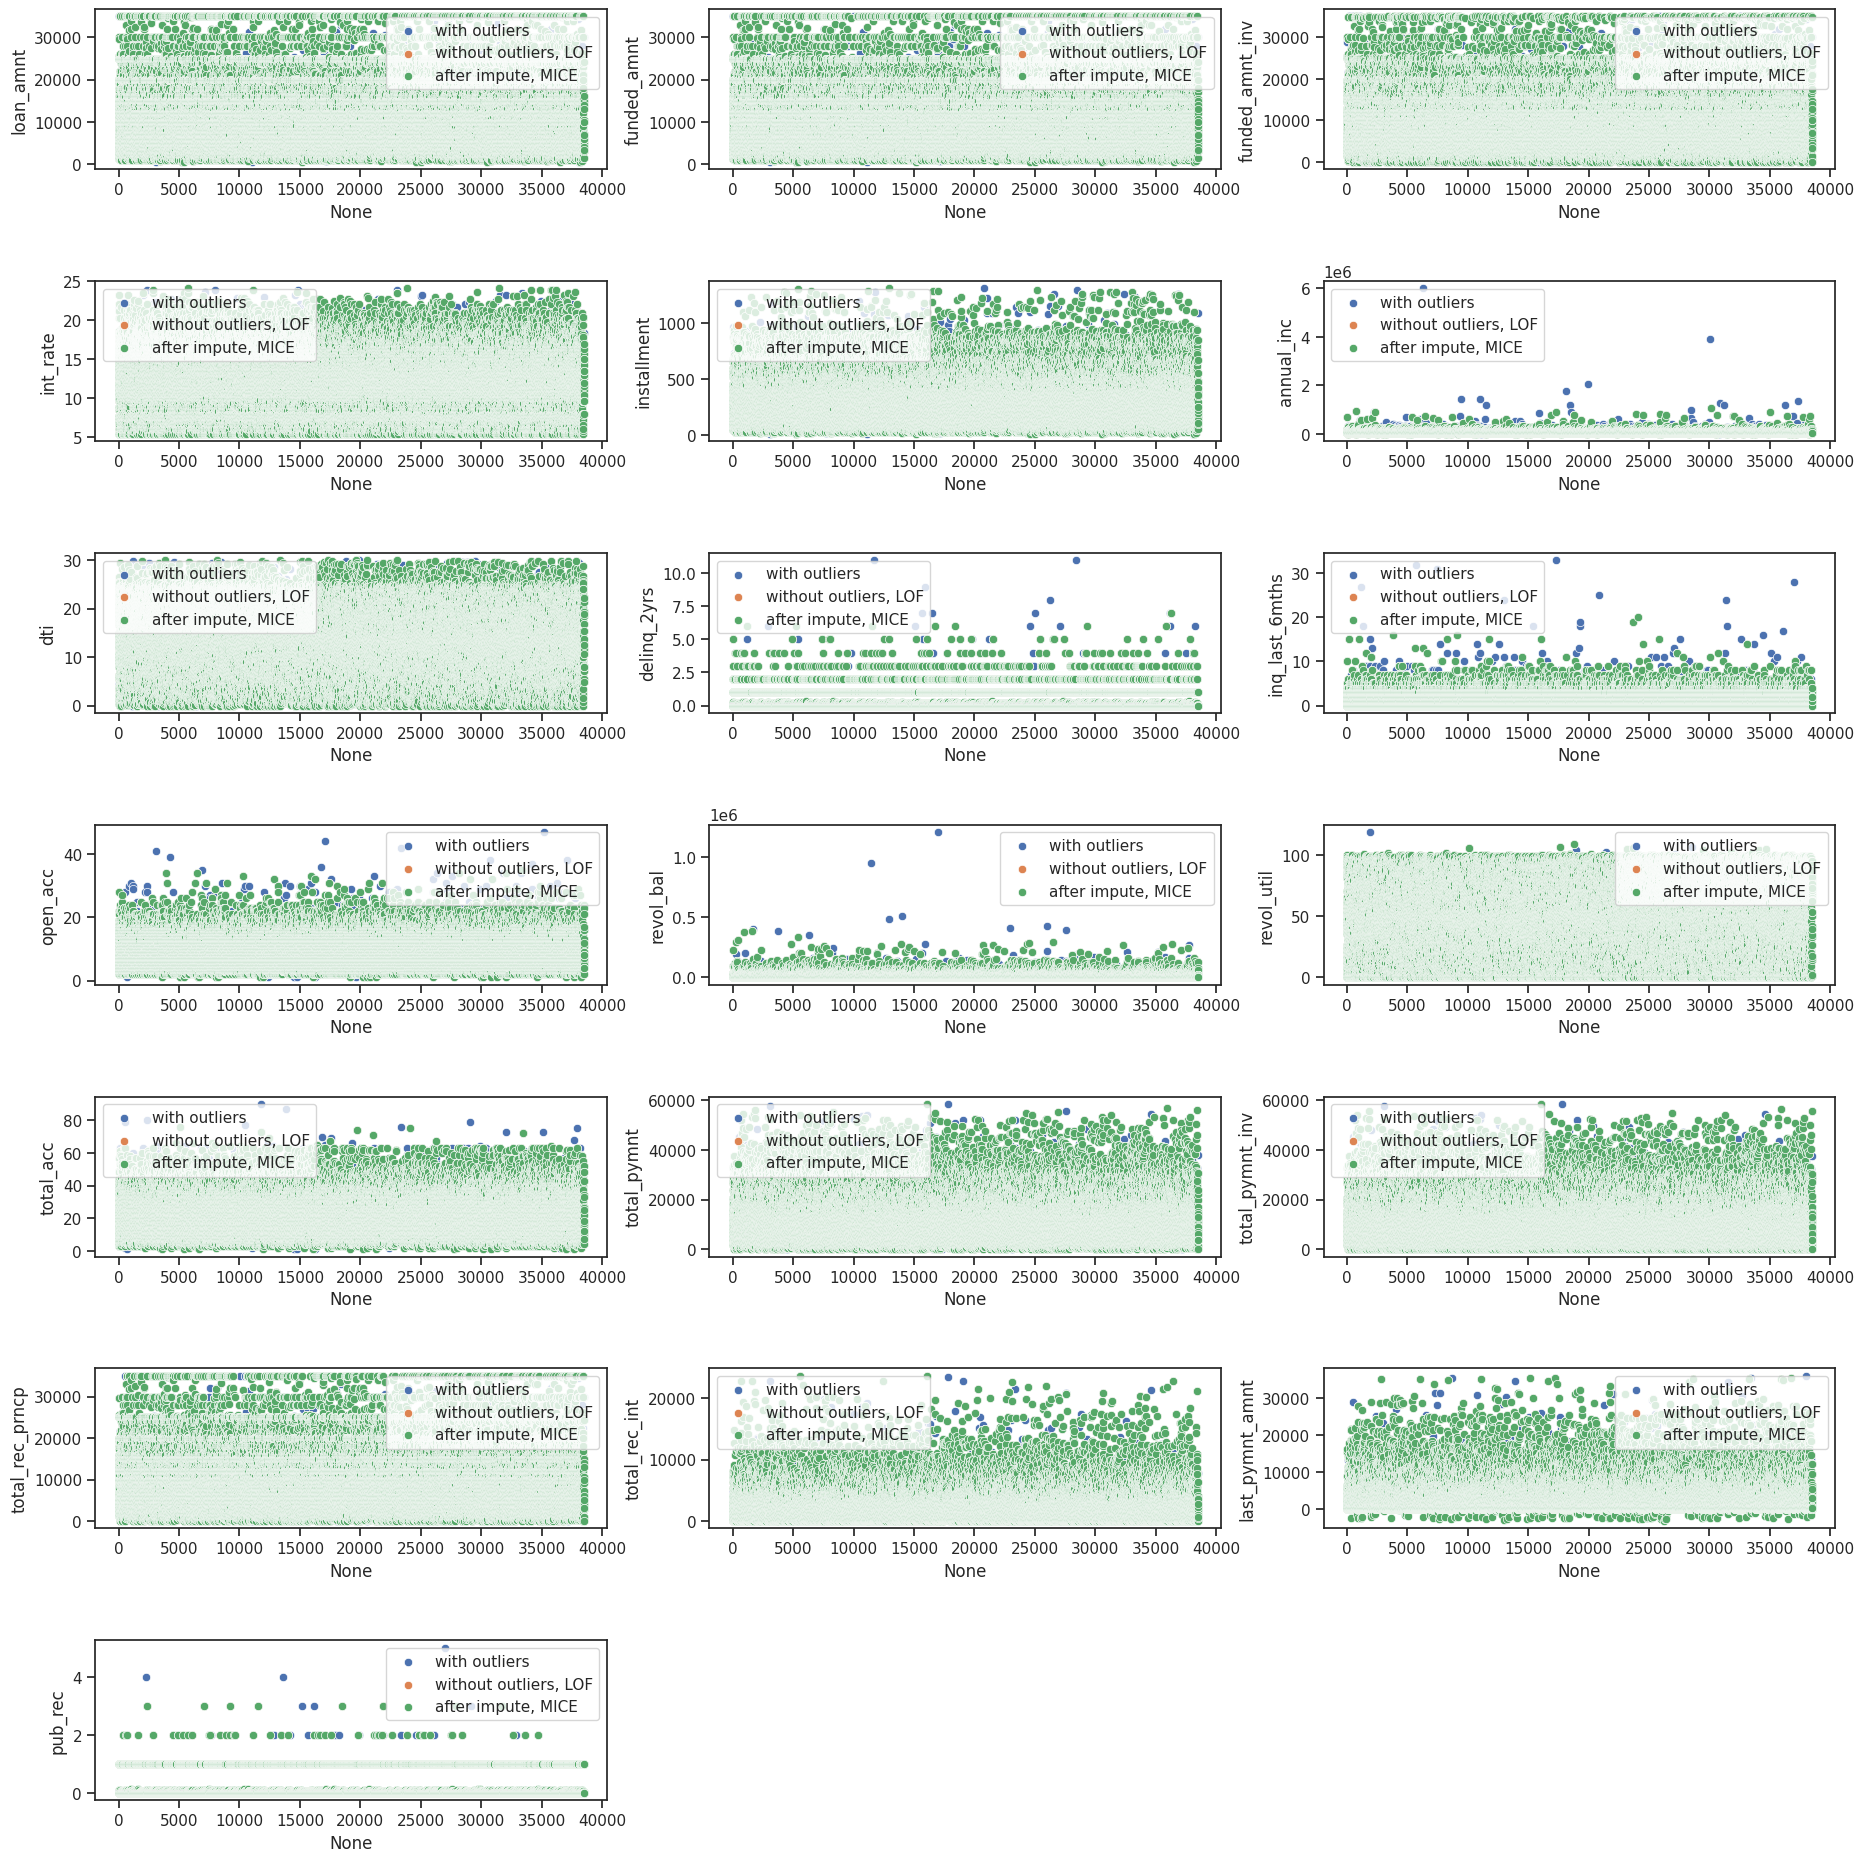

In [111]:
## scatterplots
plt.figure(figsize=(20,200))
for i, col in enumerate(df[cols_to_check_for_outliers], start=1):
  ax = plt.subplot(60, 3, i)
  sb.scatterplot(x=df_with_outliers.index, y=df_with_outliers[col], ax=ax, label='with outliers')
  sb.scatterplot(x=df_with_nulls.index, y=df_with_nulls[col], ax=ax, label=f"without outliers, {outliers_alg}")
  sb.scatterplot(x=df.index, y=df[col], ax=ax, label=f"after impute, {imputer_alg}")
  plt.subplots_adjust(hspace = 0.7)

plt.show()

In [113]:
import pandas as pd, numpy as np
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler

num = df.select_dtypes(include=np.number)
summary = pd.DataFrame({
    "n": num.notna().sum(),
    "%null": num.isna().mean().round(3),
    "mean": num.mean(),
    "std": num.std(),
    "min": num.min(),
    "p1": num.quantile(0.01),
    "p99": num.quantile(0.99),
    "max": num.max(),
    "skew": num.apply(skew, nan_policy='omit'),
    "kurt": num.apply(kurtosis, nan_policy='omit')
}).sort_values("skew", ascending=False)

corr_top = num.corr().abs()
high_corr_pairs = [(i,j,corr_top.loc[i,j]) for i in corr_top.columns for j in corr_top.columns
                   if i<j and corr_top.loc[i,j]>0.9]

print(summary.head(10))
print("High-corr pairs (>0.9):", high_corr_pairs[:10])


                   n    %null    mean        std        min        p1      \
revol_bal        38478 0.0000 13634.7574 17966.2583     0.0000     0.0000   
annual_inc       38478 0.0000 65975.8484 41799.5171  1896.0000 14400.0000   
delinq_2yrs      38478 0.0000     0.1411     0.4591     0.0000     0.0000   
pub_rec          38478 0.0000     0.0551     0.2298     0.0000     0.0000   
total_rec_int    38478 0.0000  2186.0577  2460.9820     0.0000    56.7700   
last_pymnt_amnt  38478 0.0000  2604.8905  4245.2795 -3379.3687     3.0000   
inq_last_6mths   38478 0.0000     1.0358     1.3438     0.0000     0.0000   
repay_fail       38478 0.0000     0.1515     0.3585     0.0000     0.0000   
total_pymnt_inv  38478 0.0000 11242.0170  8608.2885     0.0000   220.0000   
total_pymnt      38478 0.0000 11835.1624  8640.3111     0.0000   741.7700   

                     p99         max      skew    kurt   
revol_bal        86978.7400  385489.0000 5.6023 56.2788  
annual_inc      200000.0000 1080000.

In [114]:
results = []

for col in cols_to_check_for_outliers:

    groups = [
        df_with_outliers[col].dropna(),
        df_with_nulls[col].dropna(),
        df[col].dropna()
    ]

    # Check data validity before running ANOVA
    group_lengths = [len(g) for g in groups]
    unique_counts = [g.nunique() for g in groups]

    # Detect common problems
    if any(l < 2 for l in group_lengths):
        reason = "Too few samples in at least one group"
        f_stat, p_val = np.nan, np.nan
    elif all(u == 1 for u in unique_counts):
        reason = "All groups constant (no variance)"
        f_stat, p_val = np.nan, np.nan
    else:
        try:
            f_stat, p_val = stats.f_oneway(*groups)
            reason = (
                "Valid test" if np.isfinite(p_val)
                else "Invalid numeric result (possibly zero variance)"
            )
        except Exception as e:
            f_stat, p_val, reason = np.nan, np.nan, f"Error: {e}"

    results.append({
        "column along the process": col,
        "F_statistic": f_stat,
        "p_value": p_val,
        "significant": (p_val < 0.05) if np.isfinite(p_val) else False,
        "reason": reason
    })

anova_diagnostic = pd.DataFrame(results)
anova_diagnostic = anova_diagnostic.sort_values("p_value", na_position="last")

pd.set_option("display.float_format", "{:.4f}".format)
display(anova_diagnostic)

column along the process  F_statistic  p_value  significant    reason  
5            annual_inc       48.1930     0.0000       True     Valid test
8        inq_last_6mths       18.1867     0.0000       True     Valid test
10            revol_bal       17.4296     0.0000       True     Valid test
0             loan_amnt       11.7346     0.0000       True     Valid test
4           installment       10.1707     0.0000       True     Valid test
1           funded_amnt        8.8816     0.0001       True     Valid test
3              int_rate        7.1272     0.0008       True     Valid test
7           delinq_2yrs        6.9951     0.0009       True     Valid test
12            total_acc        6.8090     0.0011       True     Valid test
16        total_rec_int        3.5815     0.0278       True     Valid test
13          total_pymnt        3.4425     0.0320       True     Valid test
9              open_acc        2.4856     0.0833      False     Valid test
15      total_rec_prncp        2.0359     0.1306      False     Valid test
18              pub_rec        1.9999     0.1354      False     Valid test
6                   dti        1.4730     0.2292      False     Valid test
17      last_pymnt_amnt        0.8648     0.4211      False     Valid test
2       funded_amnt_inv        0.7719     0.4622      False     Valid test
11           revol_util        0.3105     0.7331      False     Valid test
14      total_pymnt_inv        0.1544     0.8570      False     Valid test

Much better now - blue dots out‚úå

In [115]:
from google.colab import files
import os

with open("./pickles/load_default_datacleansing_clean.pkl", 'wb') as f:
  pickle.dump(df, f)
  f.close()

# Get the list of files in the pickles directory
pickle_files = [f for f in os.listdir("./pickles/") if os.path.isfile(os.path.join("./pickles/", f))]

# Download each file individually
for file_name in pickle_files:
  files.download(os.path.join("./pickles/", file_name))

"pickles downloaded locally on your PC"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'pickles downloaded locally on your PC'